In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D, Flatten
from keras.models import Sequential
import os
from keras.layers import Dense, Activation, LSTM, Dropout
from sklearn.model_selection import GridSearchCV
import joblib
# import rc
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# how to use .h5 file
# https://www.tensorflow.org/tutorials/keras/save_and_load


import warnings
warnings.filterwarnings('ignore')

ARIMA 모델 사용

 * 배추가격

In [3]:
# 모든 데이터를 합친 데이터(정리된 데이터)
data = pd.read_csv('data/merge_all/merge_drop.csv')

In [13]:
#  거래년월일 컬럼을 2022-10-30 까지만 사용
train = data[data['거래년월일'] <= '2022-09-31']
#y_train = data[data['거래년월일'] <= '2022-10-31']

#  거래년월일 컬럼을 2022-10-30 일부터 사용
test = data[data['거래년월일'] > '2022-09-31']
#y_test = data[data['거래년월일'] > '2022-10-31']

In [15]:
# arima 모델로 예측해보기
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#------------------------------------------
data1 = train[['거래년월일', '전월비(%)']]
data1.index = data1.거래년월일
dt = data1.drop('거래년월일', axis=1)

data2 = test[['거래년월일', '전월비(%)']]
data2.index = data2.거래년월일
test_dt = data2.drop('거래년월일', axis=1)

In [16]:

model_arima = ARIMA(dt, order=(1,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 전월비(%)   No. Observations:                 5741
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -10014.726
Date:                Fri, 06 Jan 2023   AIC                          20035.452
Time:                        11:26:26   BIC                          20055.417
Sample:                             0   HQIC                         20042.401
                               - 5741                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0012      0.129     -0.009      0.993      -0.253       0.251
ma.L1         -1.0000      0.035    -28.435      0.000      -1.069      -0.931
sigma2         1.9169      0.068     28.184      0.0

In [23]:
model_pre=model_arima_fit.forecast(steps=60)

In [24]:
model_pre

5741    2.799806
5742    2.799613
5743    2.799419
5744    2.799225
5745    2.799032
5746    2.798838
5747    2.798644
5748    2.798451
5749    2.798257
5750    2.798063
5751    2.797870
5752    2.797676
5753    2.797483
5754    2.797289
5755    2.797095
5756    2.796902
5757    2.796708
5758    2.796514
5759    2.796321
5760    2.796127
5761    2.795934
5762    2.795740
5763    2.795546
5764    2.795353
5765    2.795159
5766    2.794965
5767    2.794772
5768    2.794578
5769    2.794385
5770    2.794191
5771    2.793997
5772    2.793804
5773    2.793610
5774    2.793416
5775    2.793223
5776    2.793029
5777    2.792836
5778    2.792642
5779    2.792448
5780    2.792255
5781    2.792061
5782    2.791867
5783    2.791674
5784    2.791480
5785    2.791287
5786    2.791093
5787    2.790899
5788    2.790706
5789    2.790512
5790    2.790318
5791    2.790125
5792    2.789931
5793    2.789738
5794    2.789544
5795    2.789350
5796    2.789157
5797    2.788963
5798    2.788769
5799    2.7885

In [21]:
test_dt

,전월비(%)
거래년월일,
2022-10-04,-6.1
2022-10-05,-6.1
2022-10-06,-6.1
2022-10-07,-6.1
2022-10-11,-6.1
2022-10-12,-6.1
2022-10-13,-6.1
2022-10-14,-6.1
2022-10-17,-6.1


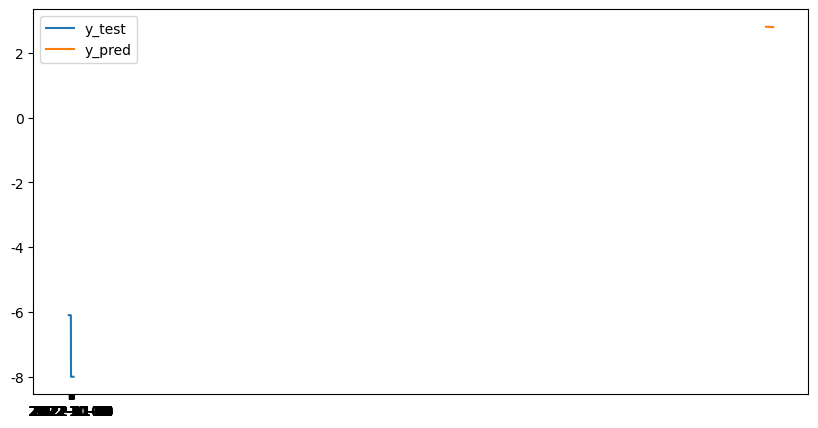

In [27]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(test_dt['전월비(%)'], label='y_test')
plt.plot(model_pre, label='y_pred')
plt.legend()
plt.show()